# Data
Data from simulations performed by McStasScript is returned as [McStasData](../_autosummary/mcstasscript.data.data.McStasData.rst) objects. This section will explore what these contain and how one can manipulate them. First a small instrument is written that will supply data to investigate.

## Example instrument
The instrument will consist of a source, a powder sample and some monitors that will record data.

In [1]:
from mcstasscript.interface import instr, functions, plotter

instrument = instr.McStas_instr("data_example")

source = instrument.add_component("source", "Source_simple")
source.set_parameters(xwidth=0.05, yheight=0.03, dlambda=0.1,
                      dist=5, focus_xw=0.015, focus_yh=0.03)
source.lambda0 = instrument.add_parameter("wavelength", value=1.2)

sample = instrument.add_component("sample", "PowderN")
sample.set_parameters(radius=source.focus_xw, yheight=source.focus_yh,
                      reflections='"Na2Ca3Al2F14.laz"', barns=0)
sample.set_AT(source.dist, RELATIVE=source)

### Example monitors
Here three monitors are defined, a 2D PSD monitor, a 1D banana monitor and an event monitor. Monitor_nD is used for the last two, where the option string describes the geometry and what is to be recorded.

In [2]:
banana = instrument.add_component("banana", "Monitor_nD", RELATIVE=sample)
banana.set_parameters(xwidth=1.5, yheight=0.4, restore_neutron=1, filename='"banana.dat"')
banana.options = '"theta limits=[5 175] bins=250, banana"'

In [3]:
event = instrument.add_component("events", "Monitor_nD", RELATIVE=sample)
event.set_parameters(xwidth=0.5, yheight=0.5, restore_neutron=1, filename='"events.dat"')
event.options = '"list all auto, x y z vx vy vz t"'

In [4]:
mon = instrument.add_component("PSD", "PSD_monitor")
mon.set_AT(0.1, RELATIVE=sample)
mon.set_parameters(nx=100, ny=100, filename='"psd.dat"',
                   xwidth=3*sample.radius, yheight=2*sample.yheight, restore_neutron=1)

## Generating data
The simulation is executed using the *backengine* method with a low number of neutrons. The data is returned by the *backengine* method, but will contain None if the simulation failed. 

In [5]:
instrument.settings(ncount=1E5, output_path="data_example")
data = instrument.backengine()

INFO: Using directory: "/Users/madsbertelsen/PaNOSC/McStasScript/github/McStasScript/docs/source/user_guide/data_example_21"
INFO: Regenerating c-file: data_example.c
CFLAGS=
INFO: Recompiling: ./data_example.out
mccode-r.c:2837:3: warning: expression result unused [-Wunused-value]
  *t0;
  ^~~
1 warning generated.
INFO: ===
         (negative time, miss next components, rounding errors, Nan, Inf).
INFO: Placing instr file copy data_example.instr in dataset /Users/madsbertelsen/PaNOSC/McStasScript/github/McStasScript/docs/source/user_guide/data_example_21

      Opening input file '/Applications/McStas-2.7.1.app/Contents/Resources/mcstas/2.7.1//data/Na2Ca3Al2F14.laz' (Table_Read_Offset)
Table from file 'Na2Ca3Al2F14.laz' (block 1) is 841 x 18 (x=1:20), constant step. interpolation: linear
  '# TITLE *-Na2Ca3Al2F14-[I213] Courbion, G.;Ferey, G.[1988] Standard NAC cal ...'
PowderN: sample: Reading 841 rows from Na2Ca3Al2F14.laz
PowderN: sample: Powder file probably of type Lazy Pulver (l

In [6]:
print(data)

[
McStasData: banana type: 1D  I:3.09053e-07 E:7.2496e-09 N:13127, 
McStasDataEvent: events with 43619 events. Variables: p x y z vx vy vz t, 
McStasData: PSD type: 2D  I:5.12526e-05 E:5.1007e-07 N:10736]


## McStasData objects
The data retrieved from the instrument object is in the form of a list that contains [McStasData](../_autosummary/mcstasscript.data.data.McStasData.rst) and [McStasDataEvent](../_autosummary/mcstasscript.data.data.McStasDataEvent.rst) objects. The McStasScript module [*functions*](../_autosummary/mcstasscript.interface.functions.rst) contains a function called [*name_search*](../_autosummary/mcstasscript.interface.functions.name_search.rst) which can be used to select a certain element of such a data list. It will match the component name first and if no match is found it will check for match with the filename. Here [*name_search*](../_autosummary/mcstasscript.interface.functions.name_search.rst) is used to retrieve the PSD [McStasData](../_autosummary/mcstasscript.data.data.McStasData.rst) object.

In [7]:
PSD = functions.name_search("PSD", data)
banana = functions.name_search("banana", data)
events = functions.name_search("events", data)

### Accessing metadata
The McStasData object carries relevant metadata in a *metadata* attribute. Using the python print function this object can display basic information on the contained data.

In [8]:
print(PSD.metadata)
print(banana.metadata)
print(events.metadata)

metadata object
component_name: PSD
filename: psd.dat
2D data of dimension (100, 100)
  [-2.25: 2.25] X position [cm]
  [-3.0: 3.0] Y position [cm]
Instrument parameters: 
 wavelength = 1.2

metadata object
component_name: banana
filename: banana.dat
1D data of length 250
  [5.0: 175.0] Longitude [deg]
 Intensity [n/s/bin]
Instrument parameters: 
 wavelength = 1.2

metadata object
component_name: events
filename: events_dat_list.p.x.y.z.vx.vy.vz.t
2D data of dimension (8, 43619)
  [1.0: 43619.0] List of neutron events
  [1.0: 8.0] p x y z vx vy vz t
Instrument parameters: 
 wavelength = 1.2



The metadata object has attributes which can be accessed as well. The info attribute is a dict with the raw metadata read from the file.

- component_name
- dimension
- filename
- limits
- parameters
- info

In [9]:
PSD.metadata.info

{'Date': 'Wed Jan 19 16:25:40 2022 (1642605940)',
 'type': 'array_2d(100, 100)',
 'Source': 'data_example (data_example.instr)',
 'component': 'PSD',
 'position': '0 0 5.1',
 'title': 'PSD monitor',
 'Ncount': '100000',
 'filename': 'psd.dat',
 'statistics': 'X0=0.00170905; dX=0.444962; Y0=-0.0029441; dY=0.887821;',
 'signal': 'Min=0; Max=8.13188e-08; Mean=5.12526e-09;',
 'values': '5.12526e-05 5.1007e-07 10736',
 'xvar': 'X',
 'yvar': 'Y',
 'xlabel': 'X position [cm]',
 'ylabel': 'Y position [cm]',
 'zvar': 'I',
 'zlabel': 'Signal per bin',
 'xylimits': '-2.25 2.25 -3 3',
 'variables': 'I I_err N',
 'Parameters': {'wavelength': 1.2}}

### Accessing the data
McStasData objects stores the data as [Numpy arrays](https://numpy.org/doc/stable/reference/generated/numpy.array.html), these can be accessed as attributes.

- Intensity: Holds the intensity, sum of all ray weights
- Error: Error on intensity
- Ncount: Number of rays that reached 

In [10]:
print("Intensity")
print(PSD.Intensity)

print("Error")
print(PSD.Error)

print("Ncount")
print(PSD.Ncount)

Intensity
[[0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 3.16421435e-13 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 ...
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 1.83098259e-10]]
Error
[[0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 3.16421435e-13 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 ...
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00

McStasDataEvent objecst stores event data, and for this reason does not have *Error* or *Ncount*. The event information is contained in a 2D Numpy array in the *Intensity* and *Events* attributes. 

In [11]:
print("Events", events.Events)

Events [[ 3.19443415e-13 -1.72869932e-02 -4.51773809e-03 ... -2.41580555e+03
  -3.05806649e+02  1.40746641e-03]
 [ 2.13584425e-12  1.71666512e-02 -8.63270069e-03 ... -3.19302620e+01
  -8.06158169e+02  1.61182199e-03]
 [ 1.19125080e-12  4.48926741e-02  3.57122451e-03 ... -1.91672521e+02
   2.31988770e+02  1.58734495e-03]
 ...
 [ 1.32055701e-12 -1.69617301e-03  3.22148392e-03 ... -7.69868816e+02
  -1.41856315e+03  1.53521303e-03]
 [ 1.24293709e-12  1.20333693e-01  8.91293709e-02 ...  1.99940422e+03
   3.26712779e+02  1.54102054e-03]
 [ 1.51518794e-12  2.36891432e-02 -5.80047664e-03 ... -1.15832262e+03
  -1.66223218e+03  1.39916492e-03]]


The original path to the data is also contained within the McStasData object and can be returned with get_data_location.

In [12]:
PSD.get_data_location()

'/Users/madsbertelsen/PaNOSC/McStasScript/github/McStasScript/docs/source/user_guide/data_example_21'

### Plotting 
[McStasData](../_autosummary/mcstasscript.data.data.McStasData.rst) objects contain information on how the data should be plotted, including for example if it should be on a logarithmic axis. This information is contained in the *plot_options* attribute of a [McStasData](../_autosummary/mcstasscript.data.data.McStasData.rst) object. The plotting are described in more detail on the [plotting page](plotting.ipynb).

In [13]:
PSD.plot_options

plot_options log: False
 colormap: jet
 show_colorbar: True
 cut_min: 0
 cut_max: 1
 x_limit_multiplier: 1
 y_limit_multiplier: 1

The plotter module of McStasScript can plot a McStasData object directly.

Plotting data with name PSD


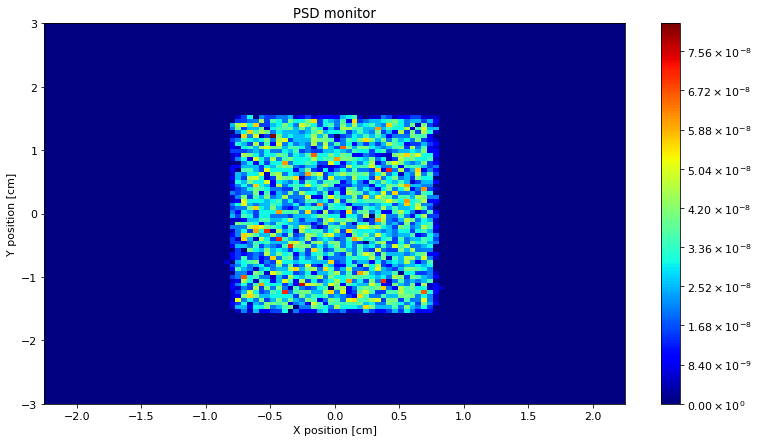

In [14]:
plotter.make_plot(PSD)

The *plot_options* can be updated with *set_plot_options* that takes keyword arguments.

Plotting data with name PSD


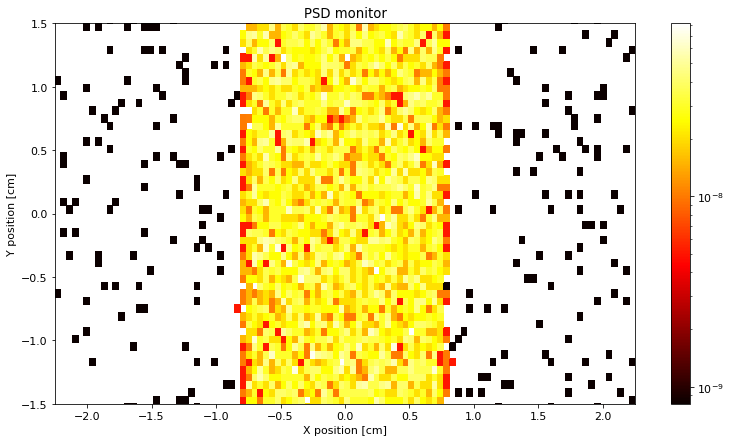

In [15]:
PSD.set_plot_options(log=True, top_lim=1.5, bottom_lim=-1.5, colormap="hot", orders_of_mag=2)
plotter.make_plot(PSD)

The *set_plot_options* takes the following keyword arguments. Some will only apply for 2D data, for example *orders_of_mag*.

| Keyword argument | Type | Default | Description |
| --- | --- | --- | --- |
| log | bool | False | Logarithmic axis for y in 1D or z in 2D |
| orders_of_mag | float | 300 | Maximum orders of magnitude to plot in 2D |
| colormap | str | "jet" | Matplotlib colormap to use |
| show_colorbar | bool | True | Show the colorbar |
| x_axis_multiplier | float | 1 | Multiplier for x axis data |
| y_axis_multiplier | float | 1 | Multiplier for y axis data |
| cut_min | float | 0 | Unitless lower limit normalized to data range |
| cut_max | float | 1 | Unitless upper limit normalized to data range |
| left_lim | float | | Lower limit to plot range of x axis |
| right_lim | float | | Upper limit to plot range of x axis|
| bottom_lim | float | | Lower limit to plot range of y axis|
| top_lim | float | | Upper limit to plot range of y axis|